## Neural Computation
## Excersise 01: Computational function of biological units

Wiktor Młynarski
*LMU Biology*
mlynarski@bio.lmu.de

### 1. Simulation of the Izhikevich Neuron Model


The Izhikevich model simplifies the famous Hodgkin-Huxley model of neural spiking. It describes  a dynamic relationship between different biophysical parameters - capacitance, conductantces and currents - all of them depending on biological details and structure of the neuron. The Izhikevich model can be used to simulate a variety of neurons from different regions - the cortex, hippocampus etc, and to capture the repertoire of their activity. It is described by four parameters $a, b, c, d$, whose biophysical meaning we can ommit for now.



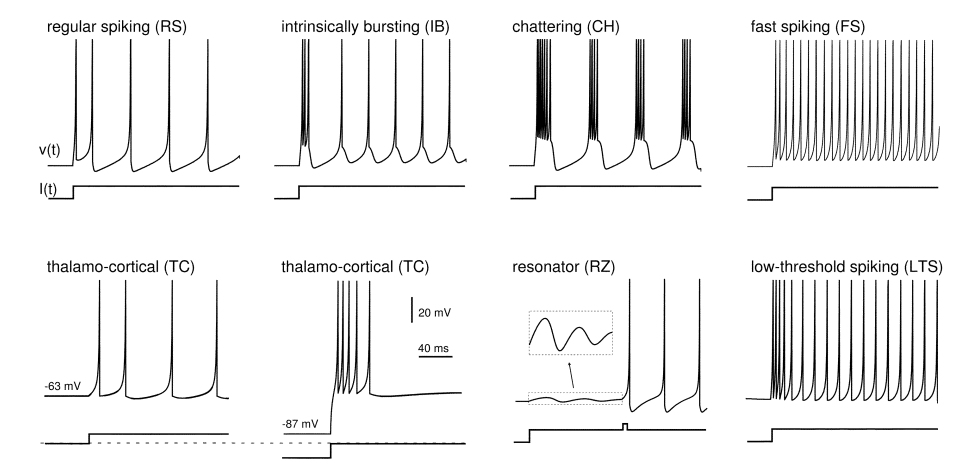

_Examples of diverse behaviors of the Izhikevich neuron model (figure taken from [1]) ._

Below is an implementation of the Izhikevich neuron model. Have a close look at the code to get a rough understanding of what is simulated and how.


Literature:

[1] Izhikevich EM *Simple model of spiking neurons*, 2003, http://izhikevich.org/publications/spikes.pdf

[2] Weber A, Pillow J, *Capturing the Dynamical Repertoire of Single Neurons
with Generalized Linear Models*, 2017,
http://pillowlab.princeton.edu/pubs/Weber17_IzhikevichGLM_NC.pdf

In [1]:
#function which simulates the Izhikevich neuron
def simulate_izhikevich_neuron(a, b, c, d, I_max=14, dt=0.01, n_t=50000):
    # --- Inputs: ---
    # a, b, c, d - parameters of the neuron
    # I_max - maximal value of the input current
    # dt - numerical integration step (in ms)
    # n_t - total number of simulation steps
    
    # --- Outputs: ---
    # v - simulated membrane potential
    # u - simulated "recovery variable"
    # spikes - a binary vector indicating in which time-bin a spike occured
    # spike_times - times of individual spikes
    # I - trajectory of the input current to the neuron
    # t_v - time vector
    
    # --- generate input ---
    I = np.zeros(n_t)
    t_start = int(0.2*n_t)
    t_stop = int(0.8*n_t)
    I[t_start:t_stop] = I_max

    # --- generate time vector ---
    T = dt * n_t #[ms]
    t_v = np.linspace(0, T, n_t)

    # --- allocate output variables ---
    #voltage membrane of the neuron
    v = np.zeros(n_t)
    
    #an auxiliary "recovery variable"
    u = np.zeros(n_t)
    
    #a binary vector indicating whether a spike occured at a given time bin
    spikes = np.zeros(n_t)

    # --- set initial conditions of the simulation ---
    v[0] = -70
    u[0] = -10

    # --- simulate ---
    for t in range(0, n_t-1):     
        #compute derivatives
        dvdt = 0.04*v[t]**2 + 5*v[t] + 140 - u[t] + I[t]    
        dudt = a*(b*v[t] - u[t])

        #update the variables using the Euler method
        v[t+1] = v[t] + dt * dvdt
        u[t+1] = u[t] + dt * dudt

        #if threshold exceeds spiking - record a spike
        if v[t+1] >= 30:
            v[t+1] = 30
            spikes[t+1] = 1

            v[t+1] = c
            u[t+1] = u[t] + d

    #extract spike times
    spike_times = t_v[np.where(spikes)]
    
    return v, u, spikes, spike_times, I, t_v

**Excersise 1)** By varying biophysical parameters $a,b,c,d$ we can now genearate different behaviors of the neuron in response to the same stimulus - a square wave of the input current. These dynamic behaviors will span a range of biological phenomena, spiking, bursting etc. Play around with the parameters and try to observe different dynamics. *Hint* - sometimes you'll need to change the maximal value of the stimulus $I_{max}$ to observe interesting behavior. Save figures for reference if necessary. You may get some inspiration by looking at reference [1] as well as Fig. 6 and Table 1 in reference [2]. Keep in mind the question - could any of these dynamic behaviors _useful_ for solving some problem?

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')


import warnings
warnings.filterwarnings('ignore')


Text(0.5, 0, 'Time [ms]')

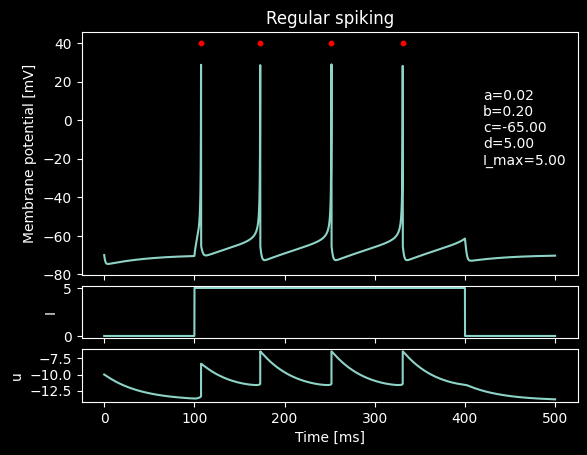

In [3]:

#length of simulation step in ms
d_t = 0.01

#total number of simulation steps
n_t = 50000

#neuron parameters
a = 0.02 # faster recovery og u
b = 0.2  # faster recovery of u using stronger dependence on v compared to -u
c = -65  # resting membrane potential post spike 
d = 5    # bump in recovery variable after spike. More d, lesser excitable neuron

#input parameters
I_max = 5

#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron(a, b, c, d, I_max, d_t, n_t)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.title('Regular spiking')
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
plt.ylabel('Membrane potential [mV]')
plt.text(420, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')

#### Low threhold spiking

Text(0.5, 0, 'Time [ms]')

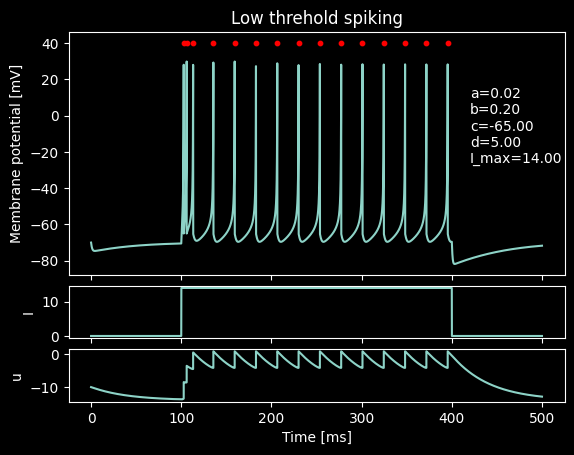

In [4]:

#length of simulation step in ms
d_t = 0.01

#total number of simulation steps
n_t = 50000

#neuron parameters
a = 0.02 # faster recovery og u
b = 0.2  # faster recovery of u using stronger dependence on v compared to -u
c = -65  # resting membrane potential post spike 
d = 5    # bump in recovery variable after spike. More d, lesser excitable neuron

#input parameters
I_max = 14

#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron(a, b, c, d, I_max, d_t, n_t)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.title('Low threhold spiking')
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
plt.ylabel('Membrane potential [mV]')
plt.text(420, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')

Text(0.5, 0, 'Time [ms]')

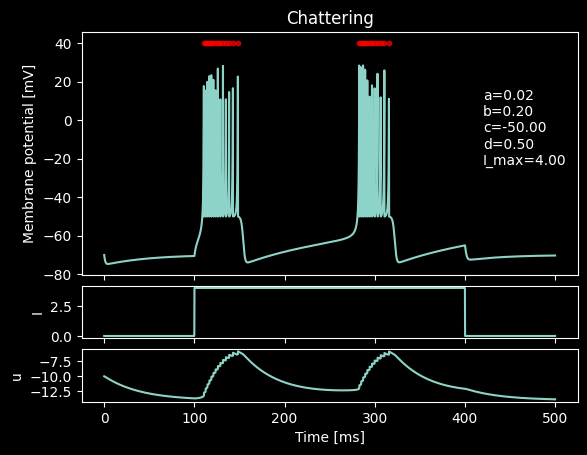

In [5]:

#length of simulation step in ms
d_t = 0.1

#total number of simulation steps
n_t = 5000

#neuron parameters
a = 0.02 # faster recovery og u
b = 0.2  # faster recovery of u using stronger dependence on v compared to -u
c = -50  # resting membrane potential post spike 
d = 0.5   # bump in recovery variable after spike. More d, lesser excitable neuron

#input parameters
I_max = 4

#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron(a, b, c, d, I_max, d_t, n_t)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red', alpha=0.7)
plt.ylabel('Membrane potential [mV]')
plt.title('Chattering')
plt.text(420, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')

### 2. Defining a function of a neuron

Biophysical models such as the Izikievich model do not address the question - what computations could be performed by a neuron with different parameters? Which function can it perform?


To quantify computation we need something extra. Let's consider a  simple scenario, where we desire the neuron to generate some specific sequence of spikes in response to a steady input (as above). We will define a *utility function* $U(t)$, which will be equal to $1$ at times when we need the neuron to spike, and $-1$ when it needs to be silent. We can now compute the average utility per spike of a spike sequence: $\bar{U}(t_1, \ldots, t_n) = \frac{1}{n} \sum_{i=1}^n U(t_i)$.


Such average utility can be now used to identify biophysical parameters $a,b,c,d$ which will generate a useful computation! We just need to find parameters, which generate a high value of the average utility $\bar{U}$ of a spike sequence $(t_1, \ldots, t_n)$. Below is an example of a utility function for detecting onsets of the input.


Question - what kind of computation can not be quantified with such utility functions? What are it's drawbacks?

---

Utlity functions cannot be used for logical computations, where the the output depends upon the inputs. Utility functions work when we know where we want the spikes. 

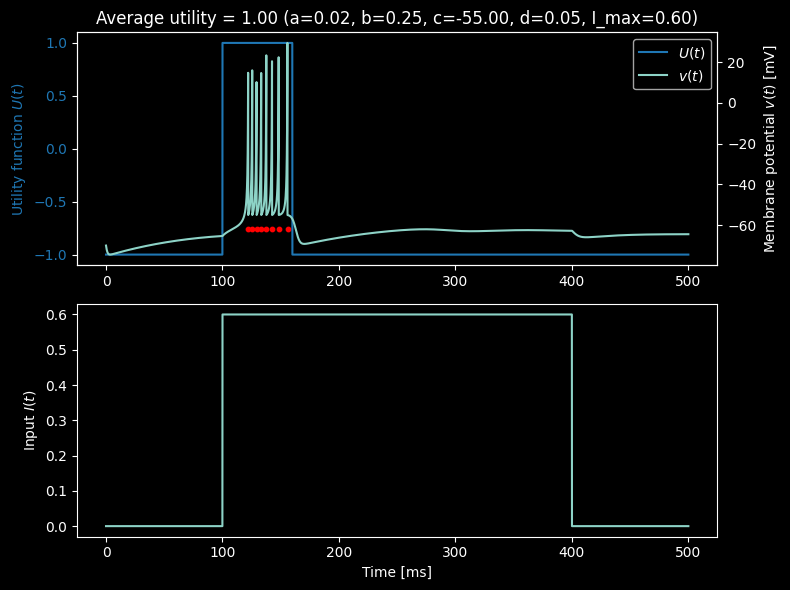

In [6]:
# mask defining when the neuron should generate a desired output
#neuron parameters
# Phasic bursting 
a = 0.02
b = 0.25
c = -55
d = 0.05

#input parameters
I_max = 0.6
dt = 0.1
n_t = 5000
#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron(a, b, c, d, I_max, d_t, n_t)


#utility for onset detection
t_start = int(0.2*n_t)
utility = np.zeros(n_t) - 1
utility[t_start:t_start+int(0.6*t_start)] = 1

#compute average utility per spike
average_utility = np.mean(utility[np.where(spikes)])

plt.figure(figsize=(8,6))

# --- Top subplot: Utility + voltage on twin y-axis ---
ax1 = plt.subplot(2,1,1)
ln1 = ax1.plot(t_v, utility, label='$U(t)$', color='tab:blue')
ax1.set_ylabel('Utility function $U(t)$', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis for voltage
ax2 = ax1.twinx()
ln2 = ax2.plot(t_v, v, label='$v(t)$')
ax2.set_ylabel('Membrane potential $v(t)$ [mV]')
ax2.tick_params(axis='y')

# Spike times
ax1.scatter(spike_times, np.ones(spike_times.shape) * np.mean(utility), 10, 'red', label='spike times')

# Combine legends
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper right')

ax1.set_title('Average utility = %.2f (a=%.2f, b=%.2f, c=%.2f, d=%.2f, I_max=%.2f)' %
              (average_utility, a, b, c, d, I_max))

# --- Bottom subplot: Input current ---
plt.subplot(2,1,2)
plt.plot(t_v, I)
plt.ylabel('Input $I(t)$')
plt.xlabel('Time [ms]')

plt.tight_layout()
plt.show()




**Excersise 2 -  Optimizing neural parameters to perform computation - (onset detection)** By manipulating parameters of the neuron (and potentially input amplitude)  find a setting which detects onsets, that is signals the beginning of the stimulus. Such neuron could serve an imporant function for the organism - for example to signal that light intensity has changed in the environment. We can measured how well does a neuron perform this computation with the onset-detection utility function. Can you identify more than one way to implement onset detection with a biophysical neuron? *Hint* - have a look at references provided above.

Text(0.5, 0, 'Time [ms]')

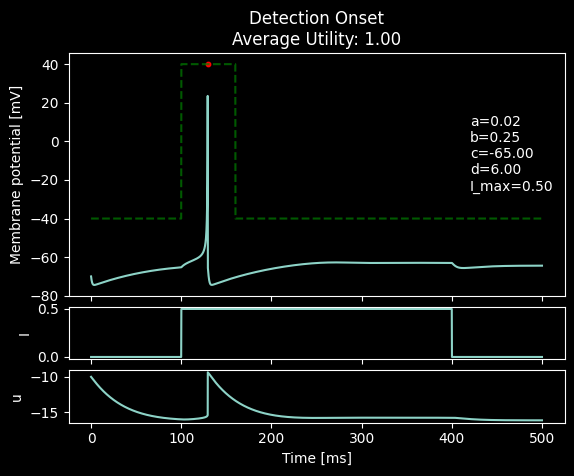

In [7]:
#length of simulation step in ms
d_t = 0.1

#total number of simulation steps
n_t = 50000

# Phasic spiking 

#neuron parameters
a = 0.02 
b = 0.25  
c = -65
d = 6

#input parameters
I_max = 0.5
n_t = 5000

#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron(a, b, c, d, I_max, d_t, n_t)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.plot(t_v, utility*40, 'g--', alpha=0.7)
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
plt.ylabel('Membrane potential [mV]')
#compute average utility per spike
average_utility = np.mean(utility[np.where(spikes)])
plt.title(f'Detection Onset\nAverage Utility: {average_utility:.2f}')
plt.text(420, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')


Text(0.5, 0, 'Time [ms]')

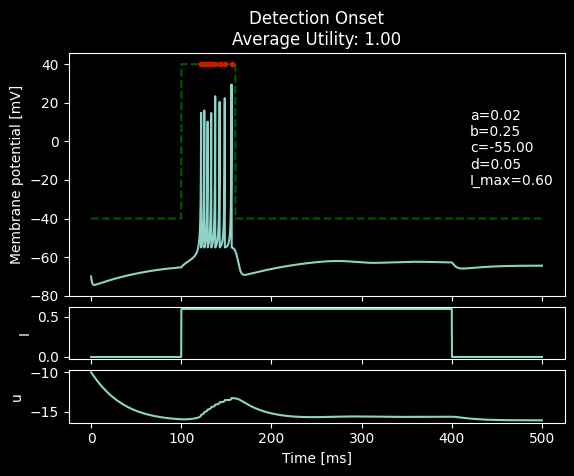

In [8]:
# Phasic bursting 
a = 0.02
b = 0.25
c = -55
d = 0.05

#input parameters
I_max = 0.6
dt = 0.1
n_t = 5000
#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron(a, b, c, d, I_max, d_t, n_t)
#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.plot(t_v, utility*40, 'g--', alpha=0.7)
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
#compute average utility per spike
average_utility = np.mean(utility[np.where(spikes)])
plt.ylabel('Membrane potential [mV]')
plt.title(f'Detection Onset\nAverage Utility: {average_utility:.2f}')
plt.text(420, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')

**Excersise 3 - robustness of computational function to biological noise**

The Izhikevich model is deterministic, i.e. it will generate the same exact sequence of spikes when presented with the same input. What if the neuron was noisy? How would that affect the performance of the onset detection? Add random noise to spikes, by jittering spike times. How does the neuron perform with the increasing level of noise? Could it be improved using different settings

---
The spike times become further from expected as we increase the noise. There are 3 ways to increase noise:
1. To jitter the spike times
2. To add noise to the input current 
3. To add noise to the membrane potential

To increase the robustness of a neuron to noise, we can increase the input current. 

In [9]:
#function which simulates the Izhikevich neuron
def simulate_izhikevich_neuron_noisy(a, b, c, d, noise_level=1,I_max=14, dt=0.01, n_t=50000, noise_type = 2):
    # --- Inputs: ---
    # a, b, c, d - parameters of the neuron
    # I_max - maximal value of the input current
    # dt - numerical integration step (in ms)
    # n_t - total number of simulation steps
    
    # --- Outputs: ---
    # v - simulated membrane potential
    # u - simulated "recovery variable"
    # spikes - a binary vector indicating in which time-bin a spike occured
    # spike_times - times of individual spikes
    # I - trajectory of the input current to the neuron
    # t_v - time vector
    
    # --- generate input ---
    I = np.zeros(n_t)
    t_start = int(0.2*n_t)
    t_stop = int(0.8*n_t)
    I[t_start:t_stop] = I_max
    if noise_type == 1:
        I += 100*noise_level * np.random.randn(n_t)  
    

    # --- generate time vector ---
    T = dt * n_t #[ms]
    t_v = np.linspace(0, T, n_t)

    # --- allocate output variables ---
    #voltage membrane of the neuron
    v = np.zeros(n_t)
    # v += noise_level*np.random.randn(n_t)
    
    #an auxiliary "recovery variable"
    u = np.zeros(n_t)
    
    #a binary vector indicating whether a spike occured at a given time bin
    spikes = np.zeros(n_t)

    # --- set initial conditions of the simulation ---
    v[0] = -70
    u[0] = -10
    
    # --- simulate ---
    for t in range(0, n_t-1):     
        #compute derivatives
        dvdt = 0.04*v[t]**2 + 5*v[t] + 140 - u[t] + I[t]    
        dudt = a*(b*v[t] - u[t])

        #update the variables using the Euler method
        v[t+1] = v[t] + dt * dvdt 
        if noise_type == 2:
            v[t+1] += noise_level*np.random.randn()
        u[t+1] = u[t] + dt * dudt

        #if threshold exceeds spiking - record a spike
        if v[t+1] >= 30:
            v[t+1] = 30
            spikes[t+1] = 1

            v[t+1] = c
            u[t+1] = u[t] + d

    #extract spike times
    if noise_type == 0:
        spike_times = t_v[np.where(spikes)] + 10*noise_level * np.random.randn(np.where(spikes)[0].shape[0])
    else:
        spike_times = t_v[np.where(spikes)]
    return v, u, spikes, spike_times, I, t_v

Text(0.5, 0, 'Time [ms]')

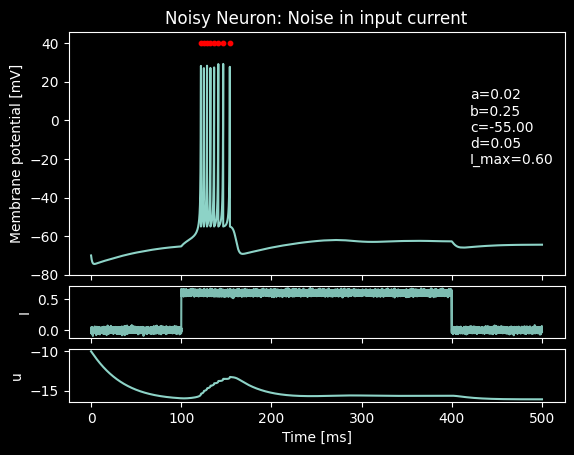

In [34]:
#length of simulation step in ms
d_t = 0.01

#total number of simulation steps
n_t = 50000

#neuron parameters
a = 0.02
b = 0.25
c = -55
d = 0.05

#input parameters
I_max = 0.6
noise_level = 0.0002

#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_noisy(a, b, c, d,noise_level, I_max, d_t, n_t, 1)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
plt.title('Noisy Neuron: Noise in input current')
plt.ylabel('Membrane potential [mV]')
plt.text(420, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I, alpha = 0.9)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')



Text(0.5, 0, 'Time [ms]')

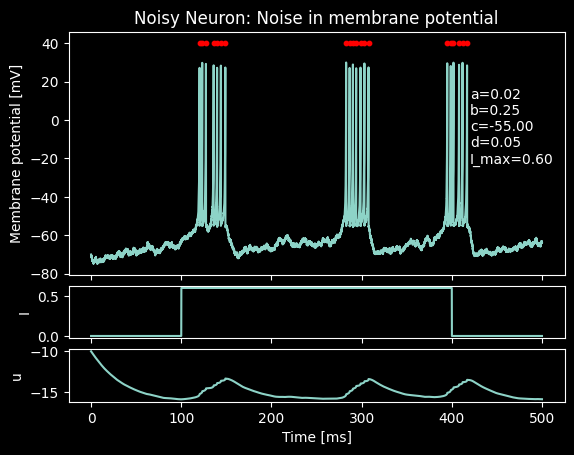

In [37]:
#length of simulation step in ms
d_t = 0.01

#total number of simulation steps
n_t = 50000

a = 0.02
b = 0.25
c = -55
d = 0.05

#input parameters
I_max = 0.6
noise_level = 0.1

#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_noisy(a, b, c, d,noise_level, I_max, d_t, n_t, 2)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
plt.title('Noisy Neuron: Noise in membrane potential')
plt.ylabel('Membrane potential [mV]')
plt.text(420, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')



**Excersise 4 - Optimizing neural parameters to perform a custom computation**
Now design your own utility function which would correspond to some meaningful task. It could be for example generation of a specific rhythm (a "clock"), integration of the input, detection of offsets, or even a very simple memory device. As before - yoy may use Fig 6 and Table 1 in Ref. [2] as an inspiration. Use your own utility function to identify one or more parameters settings which generate spiking activity. Can you find more than one solution?

In [12]:
def simulate_izhikevich_neuron_current(a, b, c, d, I, dt, n_t):
    # --- Inputs: ---
    # a, b, c, d - parameters of the neuron
    # I - input current to the neuron
    # dt - numerical integration step (in ms)
    # n_t - total number of simulation steps
    
    # --- Outputs: ---
    # v - simulated membrane potential
    # u - simulated "recovery variable"
    # spikes - a binary vector indicating in which time-bin a spike occured
    # spike_times - times of individual spikes
    # I - trajectory of the input current to the neuron
    # t_v - time vector
    
    # --- generate input ---
    if len(I) != n_t:
        raise ValueError("Input current I must have length n_t")
    t_start = int(0.2*n_t)
    t_stop = int(0.8*n_t)

    # --- generate time vector ---
    T = dt * n_t #[ms]
    t_v = np.linspace(0, T, n_t)

    # --- allocate output variables ---
    #voltage membrane of the neuron
    v = np.zeros(n_t)
    
    #an auxiliary "recovery variable"
    u = np.zeros(n_t)
    
    #a binary vector indicating whether a spike occured at a given time bin
    spikes = np.zeros(n_t)

    # --- set initial conditions of the simulation ---
    v[0] = -70
    u[0] = -10

    # --- simulate ---
    for t in range(0, n_t-1):     
        #compute derivatives
        dvdt = 0.04*v[t]**2 + 5*v[t] + 140 - u[t] + I[t]    
        dudt = a*(b*v[t] - u[t])

        #update the variables using the Euler method
        v[t+1] = v[t] + dt * dvdt
        u[t+1] = u[t] + dt * dudt

        #if threshold exceeds spiking - record a spike
        if v[t+1] >= 30:
            v[t+1] = 30
            spikes[t+1] = 1

            v[t+1] = c
            u[t+1] = u[t] + d

    #extract spike times
    spike_times = t_v[np.where(spikes)]

    return v, u, spikes, spike_times, I, t_v

Text(0.5, 0, 'Time [ms]')

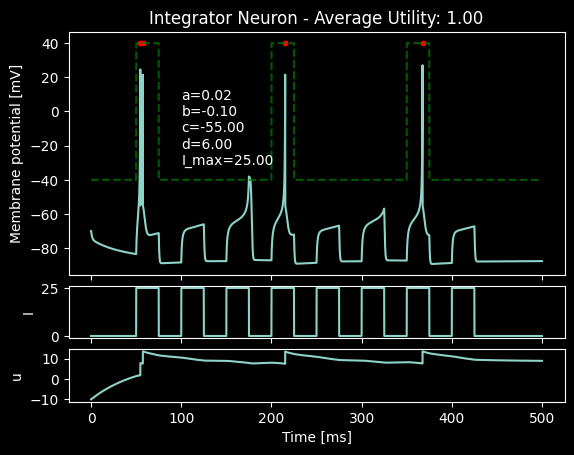

In [13]:

#length of simulation step in ms
d_t = 0.05

#total number of simulation steps
n_t = 10000

T = d_t * n_t

#neuron parameters
a = 0.02 # faster recovery og u
b = -0.1  # faster recovery of u using stronger dependence on v compared to -u
c = -55 # resting membrane potential post spike 
d = 6    # bump in recovery variable after spike. More d, lesser excitable neuron

#input parameters
I_max = 25
I = np.ones(n_t)*0
input_times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for it in input_times:
    I[int(it*n_t):int((it+0.05)*n_t)] = I_max

utility = np.zeros(n_t) - 1
utility_times = [0.1, 0.4, 0.7]
for ut in utility_times:
    utility[int(ut*n_t):int((ut+0.05)*n_t)] = 1

#compute average utility per spike
# average_utility = np.mean(utility[np.where(spikes)])



#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_current(a, b, c, d, I, d_t, n_t)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.plot(t_v, utility*40, 'g--', alpha=0.7)
plt.title(f'Integrator Neuron - Average Utility: {average_utility:.2f}')
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
plt.ylabel('Membrane potential [mV]')
plt.text(100, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')

Text(0.5, 0, 'Time [ms]')

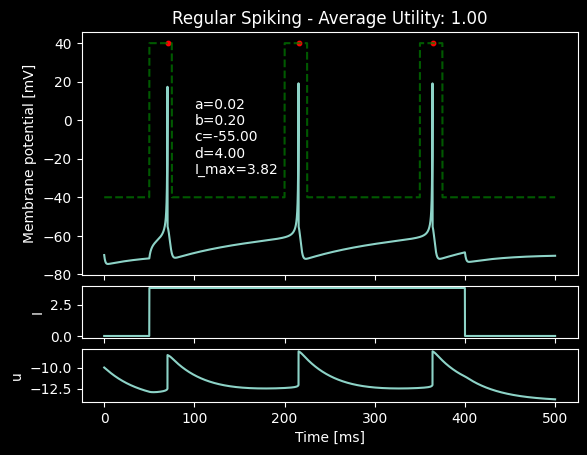

In [14]:

#length of simulation step in ms
d_t = 0.05

#total number of simulation steps
n_t = 10000

T = d_t * n_t

#neuron parameters
a = 0.02 # faster recovery og u
b = 0.2  # faster recovery of u using stronger dependence on v compared to -u
c = -55 # resting membrane potential post spike 
d = 4    # bump in recovery variable after spike. More d, lesser excitable neuron

#input parameters
I_max = 3.82
I = np.ones(n_t)*0
input_times = [0.1]
for it in input_times:
    I[int(it*n_t):int((it+0.7)*n_t)] = I_max

utility = np.zeros(n_t) - 1
utility_times = [0.1, 0.4, 0.7]
for ut in utility_times:
    utility[int(ut*n_t):int((ut+0.05)*n_t)] = 1

#compute average utility per spike
# average_utility = np.mean(utility[np.where(spikes)])



#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_current(a, b, c, d, I, d_t, n_t)

#plot results of the simulation
plt.figure()
plt.subplot(6,1,(1,4))
plt.plot(t_v, v)
plt.plot(t_v, utility*40, 'g--', alpha=0.7)
plt.title(f'Regular Spiking - Average Utility: {average_utility:.2f}')
plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
plt.ylabel('Membrane potential [mV]')
plt.text(100, v.min() + 0.5*(v.max()-v.min()), 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
plt.subplot(6,1,5)
plt.plot(t_v, I)
plt.ylabel('I')
plt.subplot(6,1,6)
plt.plot(t_v, u)
plt.ylabel('u')
plt.xlabel('Time [ms]')

#### I accidentally endedup creating a resonating neuron:

In [15]:
#function which simulates the Izhikevich neuron
def simulate_izhikevich_neuron_resonance(a, b, c, d, I_max=14, dt=0.01, n_t=50000, I_freq = 1):
    # --- Inputs: ---
    # a, b, c, d - parameters of the neuron
    # I_max - maximal value of the input current
    # dt - numerical integration step (in ms)
    # n_t - total number of simulation steps
    
    # --- Outputs: ---
    # v - simulated membrane potential
    # u - simulated "recovery variable"
    # spikes - a binary vector indicating in which time-bin a spike occured
    # spike_times - times of individual spikes
    # I - trajectory of the input current to the neuron
    # t_v - time vector
    
    # --- generate input ---
    I = np.zeros(n_t)
    t_start = int(0.1*n_t)
    t_stop = int(0.9*n_t)
    I[t_start:t_stop] = I_max*(0.5 + 0.5*np.sin(2*np.pi*I_freq*np.linspace(0, (t_stop - t_start)*dt, t_stop - t_start)))

    # --- generate time vector ---
    T = dt * n_t #[ms]
    t_v = np.linspace(0, T, n_t)

    # --- allocate output variables ---
    #voltage membrane of the neuron
    v = np.zeros(n_t)
    
    #an auxiliary "recovery variable"
    u = np.zeros(n_t)
    
    #a binary vector indicating whether a spike occured at a given time bin
    spikes = np.zeros(n_t)

    # --- set initial conditions of the simulation ---
    v[0] = -70
    u[0] = -10

    # --- simulate ---
    for t in range(0, n_t-1):     
        #compute derivatives
        dvdt = 0.04*v[t]**2 + 5*v[t] + 140 - u[t] + I[t]    
        dudt = a*(b*v[t] - u[t])

        #update the variables using the Euler method
        v[t+1] = v[t] + dt * dvdt
        u[t+1] = u[t] + dt * dudt

        #if threshold exceeds spiking - record a spike
        if v[t+1] >= 30:
            v[t+1] = 30
            spikes[t+1] = 1

            v[t+1] = c
            u[t+1] = u[t] + d

    #extract spike times
    spike_times = t_v[np.where(spikes)]
    
    return v, u, spikes, spike_times, I, t_v

def plot_result(v, u, spikes, spike_times, I, t_v, a, b, c, d, I_max, I_freq):
    #plot results of the simulation
    plt.figure()
    plt.subplot(6,1,(1,4))
    plt.plot(t_v, v)
    plt.ylim(-65, 42)
    plt.scatter(spike_times, np.ones(spike_times.shape) * 40, 10, 'red')
    plt.ylabel('Membrane potential [mV]')
    plt.title(f'Resonance:{I_freq} Hz')
    plt.text(n_t/10*4, 0, 'a=%.2f\nb=%.2f\nc=%.2f\nd=%.2f\nI_max=%.2f' % (a, b, c, d, I_max))
    plt.subplot(6,1,5)
    plt.plot(t_v, I)
    plt.ylabel('I')
    plt.subplot(6,1,6)
    plt.plot(t_v, u)
    plt.ylabel('u')
    plt.xlabel('Time [ms]')


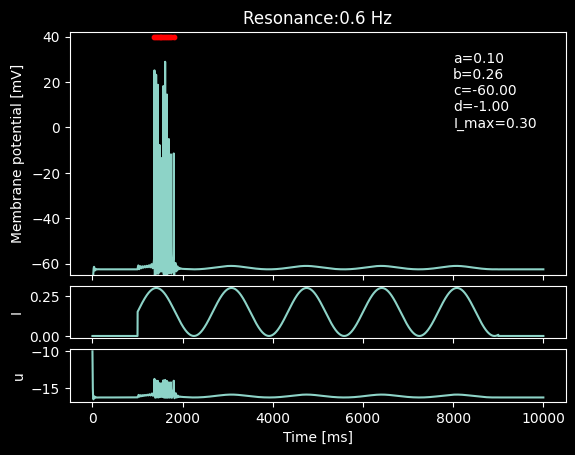

In [16]:
# mask defining when the neuron should generate a desired output
#neuron parameters
# Phasic bursting 
a = 0.1
b = 0.26
c = -60
d = -1

#input parameters
I_max = 0.3
I_freq = 0.6 # In kHzs
T = 10000 # in ms
dt = 0.5
n_t = int(T/dt)
#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_resonance(a, b, c, d, I_max, dt, n_t, I_freq=0.001*I_freq)

plot_result(v, u, spikes, spike_times, I, t_v, a, b, c, d, I_max, I_freq)


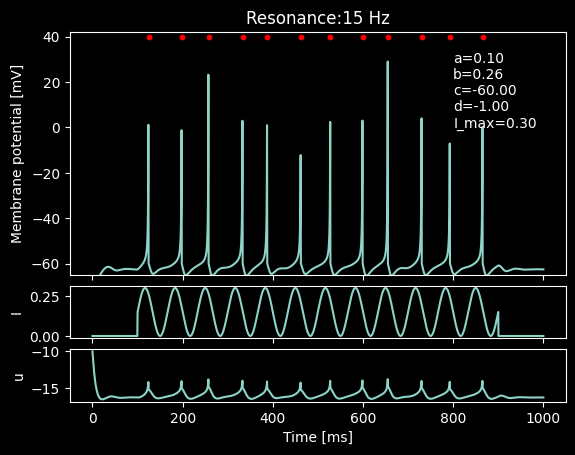

In [17]:
# mask defining when the neuron should generate a desired output
#neuron parameters
# Phasic bursting 
a = 0.1
b = 0.26
c = -60
d = -1

#input parameters
I_max = 0.3
I_freq = 15 # In Hz
dt = 0.5
T = 1000 # in ms
n_t = int(T/dt)
#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_resonance(a, b, c, d, I_max, dt, n_t, I_freq=0.001*I_freq)

plot_result(v, u, spikes, spike_times, I, t_v, a, b, c, d, I_max, I_freq)



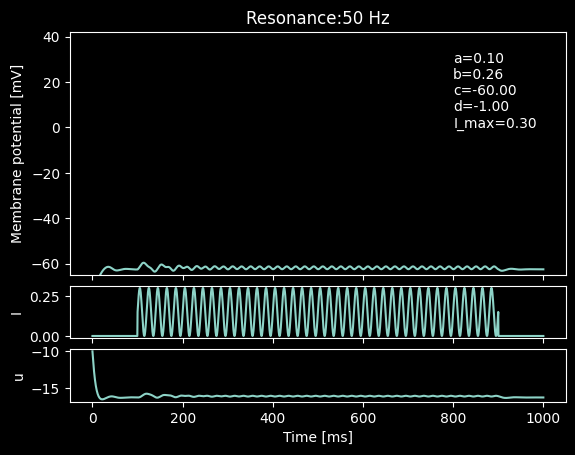

In [18]:
# mask defining when the neuron should generate a desired output
#neuron parameters
# Phasic bursting 
a = 0.1
b = 0.26
c = -60
d = -1

#input parameters
I_max = 0.3
I_freq = 50 # In kHz
dt = 0.5
T = 1000 # in ms
n_t = int(T/dt)
#run the simulation with the desired parameters
v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_resonance(a, b, c, d, I_max, dt, n_t, I_freq=0.001*I_freq)
plot_result(v, u, spikes, spike_times, I, t_v, a, b, c, d, I_max, I_freq)


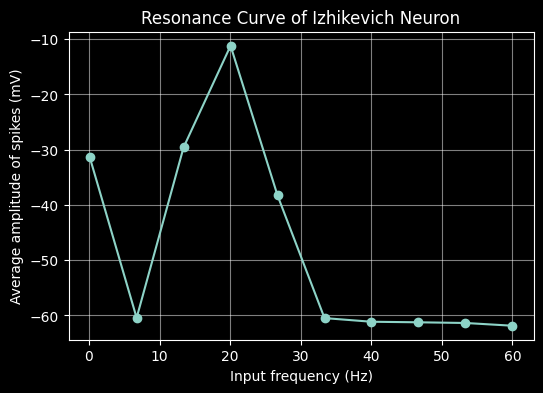

In [19]:
from scipy.signal import find_peaks

# --- Parameters ---
a = 0.1
b = 0.26
c = -60
d = -1

I_max = 0.3
T = 10000  # ms
dt = 0.5
n_t = int(T / dt)

# --- Sweep input frequencies ---
freqs = np.linspace(0.1, 60, 10)  # 30 points between 0.1 and 50 Hz
amplitudes = []

for f in freqs:
    # convert Hz → kHz for your function
    I_freq_kHz = 0.001 * f  

    # simulate
    v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_resonance(
        a, b, c, d, I_max, dt, n_t, I_freq=I_freq_kHz
    )

    # Find all local maxima in v
    peaks, _ = find_peaks(v)  # ignore very close peaks (avoid double-counting spikes)
    if len(peaks) > 1:
        # average amplitude of maximas (peak - baseline)
        baseline = -65
        avg_amp = np.mean(v[peaks])
    else:
        avg_amp = 0  # no significant oscillations/spikes

    amplitudes.append(avg_amp)

# --- Plot results ---
plt.figure(figsize=(6,4))
plt.plot(freqs, amplitudes, marker='o')
plt.xlabel("Input frequency (Hz)")
plt.ylabel("Average amplitude of spikes (mV)")
plt.title("Resonance Curve of Izhikevich Neuron")
plt.grid(True, alpha = 0.5)
plt.show()


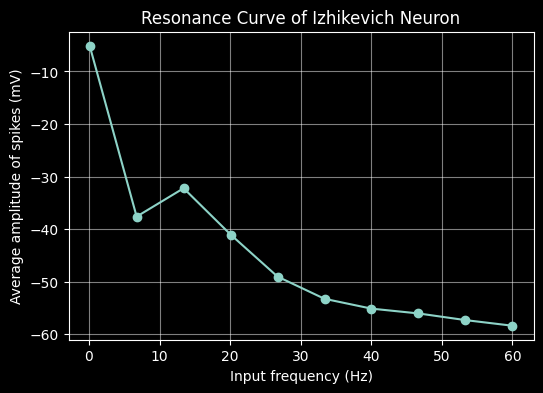

In [20]:
# --- Parameters ---
a = 0.01
b = 0.2
c = -60
d = 5

I_max = 5
T = 10000  # ms
dt = 0.5
n_t = int(T / dt)

# --- Sweep input frequencies ---
freqs = np.linspace(0.1, 60, 10)  # 30 points between 0.1 and 50 Hz
amplitudes = []

for f in freqs:
    # convert Hz → kHz for your function
    I_freq_kHz = 0.001 * f  

    # simulate
    v, u, spikes, spike_times, I, t_v = simulate_izhikevich_neuron_resonance(
        a, b, c, d, I_max, dt, n_t, I_freq=I_freq_kHz
    )

    # Find all local maxima in v
    peaks, _ = find_peaks(v)  # ignore very close peaks (avoid double-counting spikes)
    if len(peaks) > 1:
        # average amplitude of maximas (peak - baseline)
        baseline = -65
        avg_amp = np.mean(v[peaks])
    else:
        avg_amp = 0  # no significant oscillations/spikes

    amplitudes.append(avg_amp)

# --- Plot results ---
plt.figure(figsize=(6,4))
plt.plot(freqs, amplitudes, marker='o')
plt.xlabel("Input frequency (Hz)")
plt.ylabel("Average amplitude of spikes (mV)")
plt.title("Resonance Curve of Izhikevich Neuron")
plt.grid(True, alpha = 0.5)
plt.show()


**Excersise 5 - discussion** Based on the excersise you just did - what is the difference between the computational function of a system and the substrate it's implemented in? Can you identify the "Marr's levels of analysis" corresponding to different components of the simulations above (utilty function, neural parameters, spiking behavior etc)?

---
1. Computations such as resonator, integrator, edge detectors etc are important blocks in higher level computation. Thus, its interesting to implement them, describing our why?
2. We implement the why using the utility function which provides us a perfect meaasure of goodness of our neuron to our utility case. We optimize the parameters $(a,b,c,d)$ to make the neurons closer to our use caes. 
3. The physical substrate aka implementation of our system is the Izhikevich neuron equations which simulate our neurons in a biologically plausible and rich way, without being computationally too expensive. 
